# Кластеризация

[GitHub](https://github.com/koroteevmv/ML_course/tree/main/ML6.1_clustering)

Применить методы машинного обучения для решения задач кластеризации

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.cm as cm
from sklearn.cluster import KMeans
import seaborn as sns

### Задания для выполнения

1. Загрузите прилагающийся датасет.

In [ ]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
X = pd.get_dummies(df, drop_first=True)

2. Проверьте датасет на наличие пустых значений. Если есть пустые значения, то заменить их на наиболее подходящие.


In [ ]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

3. Постройте графическую интерпретацию значений датасета. В качестве x-координаты используйте Annual Income, в качестве y-координаты Spending Score.

Построим графическую интерпретацию значений датасета. В качестве x-координаты возьмем годовой доход, а в качестве y-координаты оценку трат.


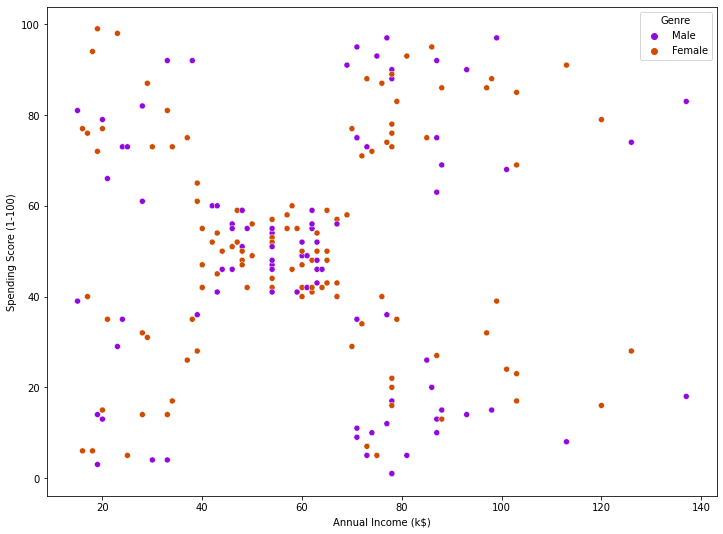

In [ ]:
fig = plt.figure(figsize=(12,9)) 
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df , hue='Genre', palette='gnuplot')

По графику можно предположить оптимальное количество кластеров для хорошего описания массива.

4. Определите наилучшее число кластеров с помощью графической зависимости числа кластеров от суммы квадратов расстояний значений датасета до центра кластера.


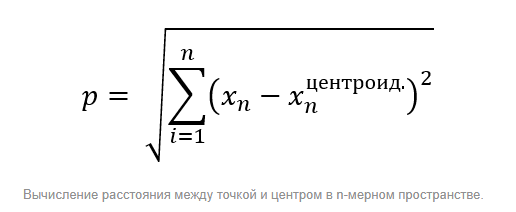

Проверим наши предположения с помощью перебора количества кластеров. Для этого построим на графике взаимосвязь суммы квадратов расстояний значений датасета до центра кластера от количества кластеров.


In [ ]:
X[np.where]

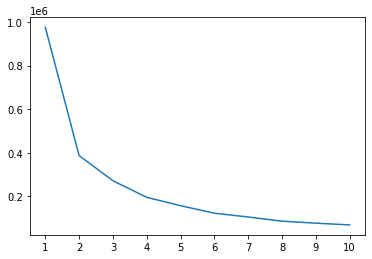

In [ ]:
wcss = []
for i in range(1, 11):
	k_means = KMeans(n_clusters=i, random_state=42)
	k_means.fit(X)
	wcss.append(k_means.inertia_)
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.show()

В качестве количества кластеров возьмем число 5. Создадим модель К-средних и обучим её.

5. Обучить модель К-средних и предсказать кластер для каждого значения из датасета.

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

6. Построить графическую интерпретацию из пункта 3, с центрами кластеров.


In [ ]:
from matplotlib.colors import ListedColormap
palette = ListedColormap(["crimson", "mediumblue", "darkmagenta", "orange", "darkgrey"])

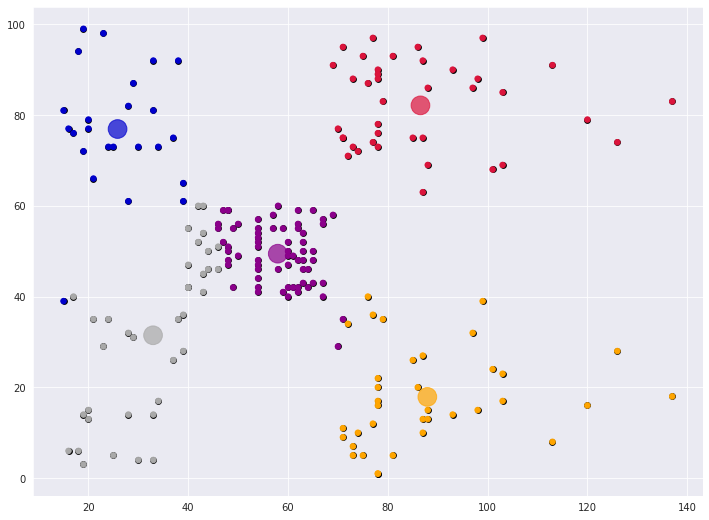

In [ ]:
fig = plt.figure(figsize=(12,9)) 
sns.set_style("darkgrid")

plt.scatter(X['Annual Income (k$)'],
            X['Spending Score (1-100)'],
            color='black',
            s=33)

plt.scatter(X['Annual Income (k$)'],
            X['Spending Score (1-100)'],
            c=kmeans.labels_,
            s=30,
            cmap=palette)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 2],
            centers[:, 3],
            c=[0, 1, 2, 3, 4],
            cmap=palette,
            s=350,
            alpha=0.7);

7. Построить графическую интерпретацию с центрами кластеров, в качестве x-координаты используйте Возраст, в качестве y-координаты Spending Score.


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

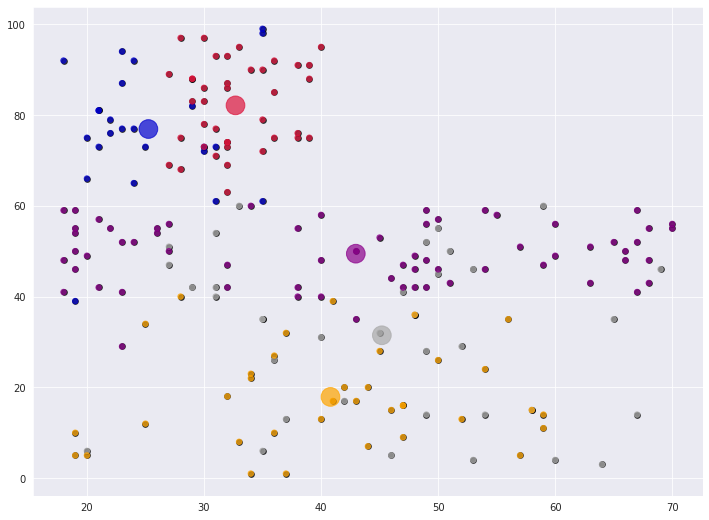

In [ ]:
fig = plt.figure(figsize=(12,9)) 
sns.set_style("darkgrid")

plt.scatter(X['Age'],
            X['Spending Score (1-100)'],
            color='black',
            s=33,
            alpha=0.7)

plt.scatter(X['Age'],
            X['Spending Score (1-100)'],
            c=kmeans.labels_,
            s=30,
            cmap=palette,
            alpha=0.7)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 1],
            centers[:, 3],
            c=[0, 1, 2, 3, 4],
            cmap=palette,
            s=350,
            alpha=0.7);

In [ ]:
kmeans.cluster_centers_

array([[162.        ,  32.69230769,  86.53846154,  82.12820513,
          0.46153846],
       [ 23.04166667,  25.25      ,  25.83333333,  76.91666667,
          0.41666667],
       [ 93.04615385,  42.96923077,  57.93846154,  49.44615385,
          0.43076923],
       [164.        ,  40.80555556,  87.91666667,  17.88888889,
          0.52777778],
       [ 35.47222222,  45.19444444,  32.94444444,  31.47222222,
          0.36111111]])

Количество строк - количество кластеров, количество столбцов - количество параметров, которые мы скармливаем модели

8. Оцените модель с помощью метрик.


[Оценка качества кластеризации: свойства, метрики](https://habr.com/ru/company/yandex/blog/500742/)

In [ ]:
silhouette_score(X, kmeans.fit_predict(X))

0.42309497779166094

In [ ]:
calinski_harabasz_score(X, kmeans.fit_predict(X))

253.85175226888728

9. Сравните эффективность модели кластеризации в зависимости от количества кластеров. Сделайте выводы.

In [ ]:
results = dict()
for i in range(2, 11):
  k_means = KMeans(n_clusters=i, random_state=42)
  k_means.fit(X)
  results[i] = {'silhouette': silhouette_score(X, k_means.fit_predict(X)),
                'calinski_harabasz': calinski_harabasz_score(X, k_means.fit_predict(X))}

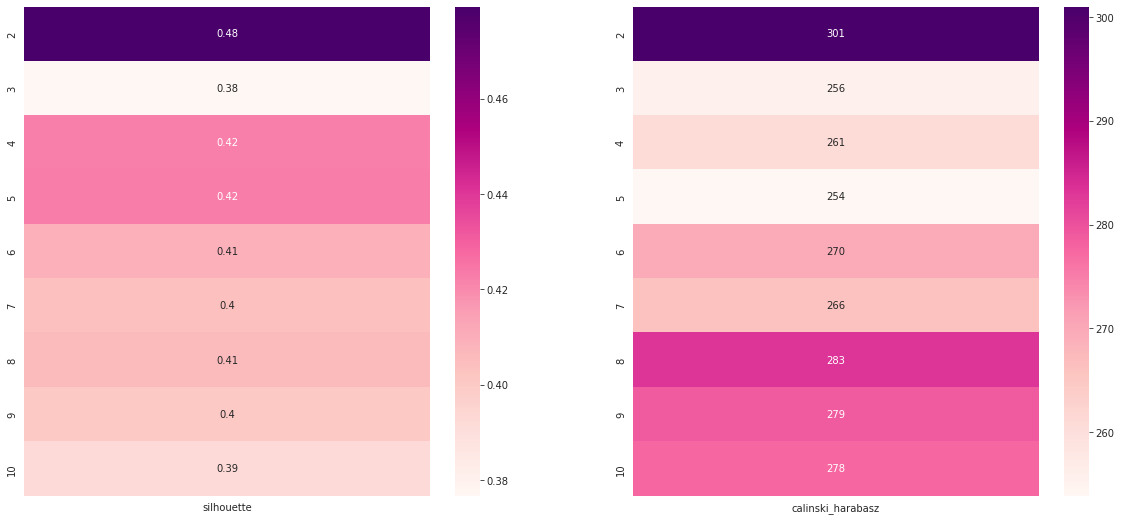

In [ ]:
fig, axes= plt.subplots(1, 2, figsize=(20,9)) 
sns.heatmap(pd.DataFrame.from_dict(results).T[['silhouette']], annot=True, cmap='RdPu', ax=axes[0])
sns.heatmap(pd.DataFrame.from_dict(results).T[['calinski_harabasz']], annot=True, cmap='RdPu', fmt='.3g', ax=axes[1])

Коэффициент силуэта или показатель силуэта - это показатель, используемый для оценки качества кластеров, созданных алгоритмом.
Баллы за силуэт варьируются от -1 до +1. Чем выше оценка силуэта, тем лучше модель.
Оценка силуэта измеряет расстояние между всеми точками данных в одном кластере. Чем меньше это расстояние, тем лучше оценка силуэта.

Оценка выше, когда кластеры плотные и хорошо разделены, таким образом более высокое значение Калински-Харабаса относится к модели с более определенными кластерами.